# Исследование объявлений о продаже квартир

План:
1. Изучим данные разными методами, чтобы проверить пропуски, типы данных и познакомиться с самими данными, которые доступны для исследования.
2. Предобработаем данные (разберёмся с пропусками и возможными дублями), приведём их к нужному типу данных.
3. Добавим несколько столбцов в таблицу, которые будут нужны для дальнейшего анализа. Столбцы эти получим на основе уже имеющихся данных.
4. Удалим явные выбросы в ключевых параметрах, которые искажают картину.
5. Приступим к самому анализу. Будем использовать методы визуализации данных из библиотек matplotlib и seaborn.
6. Сформируем выводы о рынке недвижимости Санкт-Петербурга и его окрестностей.

## Шаг 1. Изучим файл с данными

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# загружаем файл

real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 

In [99]:
# общая информация по таблице

real_estate.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [100]:
# посмотрим на первые 10 строк, чтобы понять характер заполнения таблицы

real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [101]:
# проверим на дубликаты

real_estate.duplicated().sum()

0

In [102]:
# посмотрим на количественные значения с помощью describe

display(real_estate.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


***Вывод***

Все данные в датасете были склеены в один столбец.
Сначала нужно было разделить данные: добавила в параметр функции read_csv() разделитель колонок sep.

1. Есть ***пропущенные значения*** в колонках:
    - ceiling_height - высота потолков,
    - floors_total - всего этажей в доме,
    - living_area - жилая площадь,
    - is_apartment - апартаменты (булев тип),
    - kitchen_area - площадь кухни,
    - balcony - число балконов,
    - locality_name - название населённого пункта,
    - airports_nearest - расстояние до ближ. аэропорта,
    - cityCenters_nearest - расстояние до центра города,
    - parks_around3000 - число парков в радиусе 3 км,
    - parks_nearest - расстояние до ближ. парка,
    - ponds_around3000 - число водоёмов в радиусе 3 км,
    - ponds_nearest - расстояние до ближ. водоёма,
    - days_exposition - сколько дней было размещено объявление.

Первые 6 должны были заполнить пользователи. Скорее всего, пропуски в этих стоблцах обусловлены тем, что какие-то параметры собственник просто не знал, как правильно заполнить (например, высоту потолков или площадь кухни), а какие-то пропустил по причине отрицательного ответа на предлагаемый вариант заполнения (например, вместо того, чтобы отметить, что в квартире нет балконов или что это не апартаменты). Делаю вывод, что есть пропуски и случайные (число балконов), и неслучайные (площадь, высота, число этажей), попробуем их заполнить, где это возможно, опираясь на другие данные в таблицах.

Следующие 7 параметров должны были автоматически заполниться на основе картографических данных. 
Последний 1 - должен был заполниться самим сервисом как разница между датой публикации объявления и датой снятия с публикации. Возможно, причина техническая - данные не смогли корректно загрузиться в базу.


2. ***Несоответствия типов данных***:
    - is_apartment - должен быть с типом bool, сейчас у него тип object из-за пропущенных значений,
    - first_day_exposition - д.б. с типом datetime64, сейчас тип object,
    - floors_total - д.б. целочисленным int64, сейчас тип float64,
    - balcony - д.б. целочисленным int64, сейчас тип float64,
    - parks_around3000 и ponds_around3000 - д.б. целочисленным int64, сейчас тип float64,
    - days_exposition - д.б. целочисленным int64, сейчас тип float64.

Нужно будет привести в соответствие.

3. Нет дубликатов.


4. Есть выбросы:

Квартира с общей площалью 900 кв.м, с 19 комнатами и 100-метровыми потолками) Будем чистить аномалии.


## Шаг 2. Предобработка данных

### Работа с пропусками

In [103]:
# посмотрим на все пропуски

real_estate.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Сначала разберёмся с первыми 6-ю в таком порядке:
    - is_apartment - апартаменты,
    - balcony - число балконов,
    - floors_total - всего этажей в доме,
    - ceiling_height - высота потолков,
    - living_area - жилая площадь,
    - kitchen_area - площадь кухни.


### Апартаменты (is_apartment)

In [104]:
# посмотрим на все уникальные значения столбца is_apartment, в том числе пропущенные

real_estate['is_apartment'].value_counts(dropna = False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [105]:
# заменим все NaN на False 

real_estate['is_apartment'] = real_estate['is_apartment'].fillna(False)

In [106]:
# проверяем, какие теперь значения отдаёт столбец 

print(real_estate['is_apartment'].value_counts()) 
print()

# и нет ли больше пропусков

print(real_estate['is_apartment'].isnull().sum())

False    23649
True        50
Name: is_apartment, dtype: int64

0


In [107]:
# проверим, какой теперь тип данных у этого столбца

real_estate['is_apartment'].dtypes

dtype('bool')

#### Пояснение

Похоже, что значения NaN в is_apartment - это те квартиры, которые не относятся к аппартаментам. Поэтому заменили все пропуски на False. 

После устранения пропусков тип столбца изменился на нужный булевый тип данных.

### Балконы (balcony)

In [108]:
# посмотрим на все уникальные значения столбца balcony, в том числе пропущенные

real_estate['balcony'].value_counts(dropna = False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [109]:
# заменим все NaN на 0 

real_estate['balcony'] = real_estate['balcony'].fillna(0)

In [110]:
# проверяем, какие теперь значения отдаёт столбец 

print(real_estate['balcony'].value_counts()) 
print()

# и нет ли больше пропусков

print(real_estate['balcony'].isnull().sum())

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

0


In [111]:
# сразу поменяем тип данных у столбца с float64 на int64

print(real_estate['balcony'].dtypes) # какой был
real_estate['balcony'] = real_estate['balcony'].astype('int64') #меняем
print(real_estate['balcony'].dtypes) #какой стал

float64
int64


#### Пояснение
Скорее всего, пустые значения у тех квартир, где нет балконов, поэтому пользователь не заполнил это поле. Заменили все пропуски на 0. 

Затем привели столбец к целочисленному типу данных.

### Всего этажей в доме (floors_total)

In [112]:
# проверим, сколько всего строк с пропущенным значением этажей в доме

real_estate['floors_total'].isnull().sum()

86

In [113]:
# напишем функцию, которая будет заполнять пропущенные значения или медианой количества этажей, 
# или приравнивать этаж квартиры, если он меньше медианы

floors_median = real_estate['floors_total'].median()

def floors_median_func(row):
    floor = row['floor']
    floors = row['floors_total']

    if floors != floors and floor < floors_median:
        return floors_median
    else:
        return floor

real_estate.loc[real_estate['floors_total'].isnull(), 'floors_total'] = \
real_estate.loc[real_estate['floors_total'].isnull()].apply(floors_median_func, axis=1)

In [114]:
# проверим, нет ли больше строк с пропущенным значением этажей в доме

real_estate['floors_total'].isnull().sum()

0

In [115]:
# поменяем тип данных у столбца с float64 на int64 

print(real_estate['floors_total'].dtypes) # какой был
real_estate['floors_total'] = real_estate['floors_total'].astype('int64') #меняем
print(real_estate['floors_total'].dtypes) #какой стал

float64
int64


#### Пояснение
Возможно, собственники забыли указать этажность, а может, и не захотели сужать круг заинтересованных в зависимости от указанного этажа, поэтому не заполнили намеренно. 

Не указано общее количество этажей в доме всего в 86 строках - это очень малый процент от общего количества строк. Мы заполнили их с помощью функции, которая подставляет в пропуск либо медиану общего количества этажей, либо значение этажа, на котором расположена квартира, если это значение меньше медианы.

Как выяснили ранее на первом шаге, значения этого столбца нужно было перевести в целочисленный тип. Перевели в int64 все непропущенные значения.

### Высота потолков (ceiling_height)

In [116]:
# сколько пропущенных значений с высотой потолка

real_estate['ceiling_height'].isnull().sum()

9195

In [117]:
# вспомним, какие средние характеристики по этому столбцу

real_estate['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [118]:
# напишем функцию, которая будет заполнять пропущенные значения медианой высоты потолка в зависимости от количества этажей в доме

ceiling_height_median = real_estate.groupby('floors_total')['ceiling_height'].median().dropna()

def ceilings_median_func(row):
    floors_total = row['floors_total']
    new_ceiling_height = row['ceiling_height']

    if new_ceiling_height != new_ceiling_height:
        try:
            new_ceiling_height = ceiling_height_median[floors_total]
        except:
            new_ceiling_height = ceiling_height_median.median()
        return new_ceiling_height

    else:
        return new_ceiling_height
    
real_estate.loc[real_estate['ceiling_height'].isnull(), 'ceiling_height'] = \
real_estate.loc[real_estate['ceiling_height'].isnull()].apply(ceilings_median_func, axis=1)

In [119]:
# проверяем, нет ли больше пропусков

real_estate['ceiling_height'].isnull().sum()

0

#### Пояснение
Не каждый собственник смог/захотел посчитать или найти в планах высоту потолков в своей квартире.

Т.к. среднее арифметическое и медиана не сильно отличаются (12 см), можно заполнить отсутствующие значения характерным числом.
Выбрали для этого медиану, чтобы не влияли выбросы в виде 100-метровых потолков.

С помощью функции заполнили отсутствующие значения медианой в зависимости от количества этажей в доме, чтобы квартиры были сгруппированы по типам домов.

### Жилая площадь (living_area) и площадь кухни (kitchen_area)

In [120]:
# сколько пропущенных значений с жилой площадью и площадью кухни

real_estate[['living_area', 'kitchen_area']].isnull().sum()

living_area     1903
kitchen_area    2278
dtype: int64

In [121]:
# вспомним, какие средние характеристики по этим столбцам

real_estate[['living_area', 'kitchen_area']].describe()

,living_area,kitchen_area
count,21796.000000,21421.000000
mean,34.457852,10.569807
std,22.030445,5.905438
min,2.000000,1.300000
25%,18.600000,7.000000
50%,30.000000,9.100000
75%,42.300000,12.000000
max,409.700000,112.000000


In [122]:
# с помощью функции посчитаем медианы соотношения (ratio) интересующих площадей и общей площади в зависимости 
# от количества комнат в квартире, чтобы заполнить медианами пустые значения, где соотношение пока вычислить нельзя

def room_median(real_estate, room, ratio):
    for item in real_estate[room].unique():
        real_estate.loc[(real_estate[room] == item) & (real_estate[ratio].isnull()), ratio] = \
        real_estate[real_estate[room] == item][ratio].median()
    return real_estate

In [123]:
# получим по порядку два значения ratio для подстановки в функцию - делим жилую площадь/площадь кухни на общую 
# (использую для этого непустые значения)
# затем заполняем пропуски, применив функцию к датафрейму и рассчитав жилую и площадь кухни через умножение 
# соотношения на общую площадь

real_estate['living_ratio'] = real_estate['living_area'].notna() / real_estate['total_area']
real_estate = room_median(real_estate, 'rooms', 'living_ratio')
real_estate['living_area'].fillna(value=real_estate['living_ratio'] * real_estate['total_area'], inplace=True)

real_estate['kitchen_ratio'] = real_estate['kitchen_area'].notna() / real_estate['total_area']
real_estate = room_median(real_estate, 'rooms', 'kitchen_ratio')
real_estate['kitchen_area'].fillna(value=real_estate['kitchen_ratio'] * real_estate['total_area'], inplace=True)

In [124]:
# проверим, что все пустые значения заполнены

real_estate[['living_area', 'kitchen_area']].isnull().sum()

living_area     0
kitchen_area    0
dtype: int64

#### Пояснение
Выяснить необходимую площадь не так-то просто. Нужно либо иметь данные планировки, либо умудриться посчитать самому. Не все собственники с этим смогли справиться.

Действуем по аналогии с потолками.
Т.к. среднее арифметическое и медиана несильно отличаются по обеим площадям, можно заполнить отсутствующие значения характерным числом. Также выбрали для этого медиану, чтобы не влияли выбросы.

С помощью функции, вычисляющей соотношение разных площадей в квартирах в зависимости от количества комнат, заполнили отсутствующие значения, умножив полученные медианные соотношения на площади квартир, которые все нам известны.


##### Теперь разбираемся с оставшимися пропусками:
    - parks_around3000 - число парков в радиусе 3 км,
    - ponds_around3000 - число водоёмов в радиусе 3 км,

    - days_exposition - сколько дней было размещено объявление,
    
    - locality_name - название населённого пункта,
    - airports_nearest - расстояние до ближ. аэропорта,
    - cityCenters_nearest - расстояние до центра города,
    - parks_nearest - расстояние до ближ. парка,
    - ponds_nearest - расстояние до ближ. водоёма.



### Количество парков (parks_around3000) и водоёмов (ponds_around3000) рядом

#### Пояснение

Скорее всего, пропуски вызваны технической причиной - данные не загрузились в базу. Работать с этими двумя столбцами в дальнейшем не будем, поэтому заполнять пропуски в них не требуется. 


### Сколько дней было размещено объявление (days_exposition)

In [125]:
# проверим, сколько всего у нас строк с пропущенным значением количества дней публикации

real_estate['days_exposition'].isnull().sum()

3181

In [126]:
# поменяем тип данных у столбца с float64 на int64 для всех непропущенных значений

real_estate.loc[real_estate['days_exposition'].notna(), 'days_exposition'] = \
real_estate.loc[real_estate['days_exposition'].notna(),'days_exposition'].astype('int64')

# проверим вывод первых 5-ти строк

real_estate['days_exposition'].head()

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
Name: days_exposition, dtype: float64

#### Пояснение

У нас нет сведений, когда объявления были сняты с публикации, заполнить пропуски самостоятельно не можем.
Оставим их пустыми, чтобы не заполнять 3000 строк наугад средними значениями.

Как выяснили ранее в первом шаге, значения этого столбца нужно было перевести в целочисленный тип. Перевели в int64 все непропущенные значения.

### Картографические данные

Оставшиеся значения с пропусками:
- locality_name - название населённого пункта,
- airports_nearest - расстояние до ближ. аэропорта,
- cityCenters_nearest - расстояние до центра города,
- parks_nearest - расстояние до ближ. парка,
- ponds_nearest - расстояние до ближ. водоёма.

Мы никак не сможем самостоятельно вычислить, где находится квартира и какое расстояние от неё до нужных объектов.
Не будем трогать эти пропуски, чтобы не терять строки для анализа по другим параметрам.

### Категориальные данные (locality_name)

In [127]:
# посмотрим на уникальные значения населённых пунктов

real_estate['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Пижма                     1
поселок Почап                     1
деревня Снегирёвка                1
поселок Коробицыно                1
посёлок Форт Красная Горка        1
Name: locality_name, Length: 364, dtype: int64

In [128]:
# видим, что в таблице присутствует разное написание "посёлок" и "поселок", приведём к единому стилю

real_estate['locality_name'] = real_estate['locality_name'].str.replace('ё','е')

#### Пояснение

Заменили букву "ё" на "е" в датасете, чтобы привести к единому виду написание посёлков.
В дальнейшем это поможет при группировке по названиям населённых пунктов.

### Типы данных

Нужно было поменять тип данных у этих столбцов:
    - is_apartment - должен быть с типом bool, 
    - balcony - д.б. целочисленным int64, 
    - floors_total - д.б. целочисленным int64, 
    - days_exposition - д.б. целочисленным int64, 
    - first_day_exposition - д.б. с типом datetime64.
    
Все столбцы привели к нужным типам данных в процессе исследования пропусков, осталось разобраться только с одним:
    - first_day_exposition

In [129]:
# вспомним, как выглядит дата сейчас

real_estate['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [130]:
# переведём из строки в дату и время

real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

# проверим формат отображения

real_estate['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [131]:
# проверим тип данных

real_estate['first_day_exposition'].dtypes

dtype('<M8[ns]')

#### Пояснение

Все данные в датафрейме приведены к нужным типам данных.

## Шаг 3. Расчёт и добавление дополнительных данных в таблицу

Нужно добавить столбцы со следующими данными:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (первый, последний, другой).

Добавим все по порядку. 

#### Цена квадратного метра

In [132]:
# добавляем новый столбец с ценой за квадратный метр, округлив его до целого числа

real_estate['price_sq_m'] = (real_estate['last_price'] / real_estate['total_area']).round(0)

# проверим на первых пяти значениях

real_estate['price_sq_m'].head()

0    120370.0
1     82921.0
2     92786.0
3    408176.0
4    100000.0
Name: price_sq_m, dtype: float64

#### День недели, месяц и год публикации объявления

In [133]:
# добавляем столбцы с днём недели, месяцем и годом публикации объявления

real_estate['day_exposition'] = real_estate['first_day_exposition'].dt.day_name()
real_estate['month_exposition'] = real_estate['first_day_exposition'].dt.month_name()
real_estate['year_exposition'] = real_estate['first_day_exposition'].dt.year

# проверяем на первых пяти значениях

print(real_estate['day_exposition'].head())
print()
print(real_estate['month_exposition'].head())
print()
print(real_estate['year_exposition'].head())

0    Thursday
1     Tuesday
2    Thursday
3      Friday
4     Tuesday
Name: day_exposition, dtype: object

0       March
1    December
2      August
3        July
4        June
Name: month_exposition, dtype: object

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64


#### Этаж квартиры

In [134]:
# напишем функцию для распределения квартир по этажам

def floor_type(floor):
        if floor['floor'] == 1:
            return 'первый'
        elif floor['floor'] == floor['floors_total']:
            return 'последний'
        else:
            return 'другой'

# применим её к датафрейму

real_estate['floor_type'] = real_estate.apply(floor_type, axis=1)

# проверяем

real_estate['floor_type'].head(15)

0        другой
1        первый
2        другой
3        другой
4        другой
5        другой
6        другой
7        другой
8        другой
9        другой
10       другой
11       другой
12    последний
13    последний
14       первый
Name: floor_type, dtype: object

## Шаг 4. Исследовательский анализ данных

### 1. Изучаем параметры квартир

Нужно построить гистограммы для каждого параметра:
- площадь,
- цена,
- число комнат,
- высота потолков. 

total_area


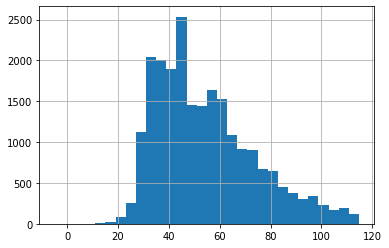

last_price


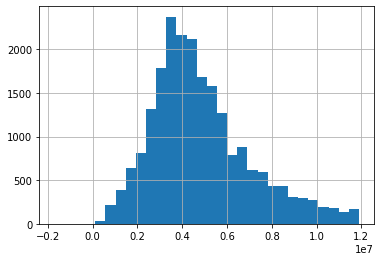

rooms


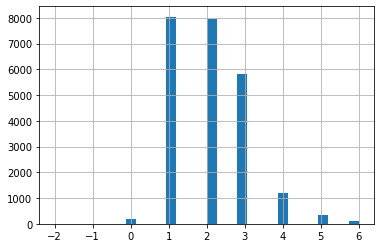

ceiling_height


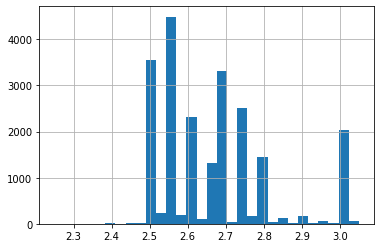

In [135]:
# выделим нужные параметры в отдельный список

parameters = ['total_area', 'last_price', 'rooms', 'ceiling_height']

# построим гистограммы с помощью цикла, перебирающего параметры из списка

for parameter in parameters:
    Q1 = real_estate[parameter].quantile(0.25)
    Q3 = real_estate[parameter].quantile(0.75)
    IQR = Q3 - Q1
    
    print(parameter)
    plt.hist(
        real_estate[parameter],
        bins=30, 
        range=(Q1-1.5*IQR, Q3+1.5*IQR)
    )
    plt.grid(True)
    plt.show()    

***Предварительные выводы***

- Есть пик для квартир с площадью 50 кв.м.
- В основном цены на квартиры лежат в диапазоне до 10 млн.р. с пиком около 4-5 млн.р. После отметки в 60 млн.р. число квартир с такой ценой и выше снижается - запомним эту цифру для фильтрации выбросов в дальнейшем.
- Чаще всего продают 1-2-комнатные квартиры. Трёшки отстают по предложеням совсем немного. 
- В среднем высота потолков составляет от 2,5 до 3 м.

### 2. Изучаем время продажи квартиры

Нужно:
- Построить гистограмму. 
- Посчитать среднее и медиану. 
- Описать, сколько обычно занимает продажа. 
- Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

**Гистограмма**

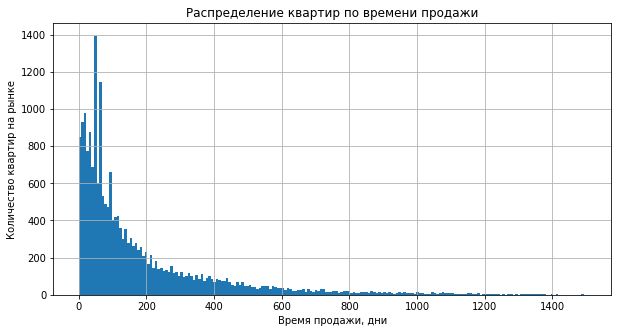

In [136]:
real_estate.hist('days_exposition', bins = 200, figsize=(10,5), range=(0, 1500));
plt.title('Распределение квартир по времени продажи');
plt.xlabel('Время продажи, дни');
plt.ylabel('Количество квартир на рынке');

**Среднее и медиана**

In [137]:
print(real_estate['days_exposition'].mean()) # среднее
print()
print(real_estate['days_exposition'].median()) # медиана

180.88863436982163

95.0


***Вывод***

Среднее в два раза больше медианы - так влияет длинный хвост высоких значений.

**Сколько обычно занимает продажа квартиры**

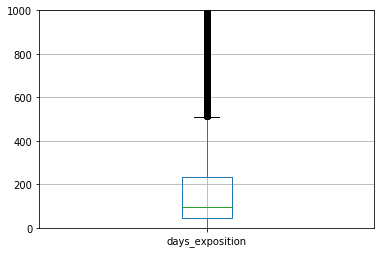

In [138]:
plt.ylim(0, 1000)
real_estate.boxplot('days_exposition');

***Вывод***

Продажа квартиры занимает обычно от 1,5 до 7 месяцев.

**Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

Если продажа квартиры занимает пару недель (45 дней) - это короткий срок, очень быстрая продажа.
Если же квартира продаётся 3 года (1000 дней) и дольше - слишком долго.

### 3. Убираем редкие и выбивающиеся значения

Уберём квартиры с:
- очень высокой ценой, 
- слишком высокими потолками, 
- большим количеством комнат,
- огромной площадью
- и те, которые продавали слишком долго.

**Высокая цена**

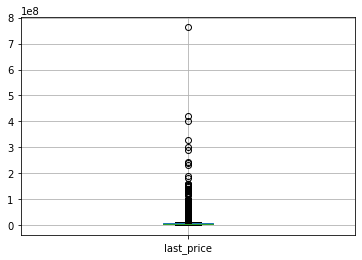

In [139]:
# посмотрим на разброс цен с помощью boxplot

real_estate.boxplot('last_price');

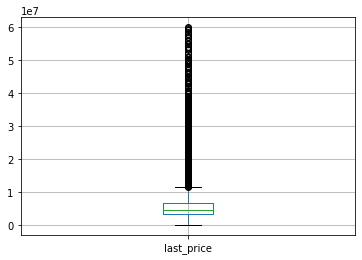

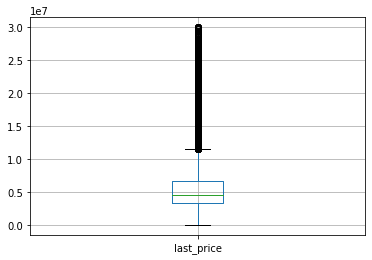

In [140]:
# как видим на графике, есть много выбросов с квартирами с очень высокой ценой
# ранее в качестве отметки максимальной цены мы обозначили цену в 60 млн.р, отфильтруем по ней

real_estate.query('last_price < 60000000').boxplot('last_price')
plt.show()

# по-прежнему много выбросов, срежем все квартиры дороже 30 млн.
real_estate.query('last_price < 30000000').boxplot('last_price')
plt.show()

# сохраним в новую переменную
real_estate_good = real_estate.query('last_price < 30000000')

Большинство квартир продаётся по цене от 3 до 7 млн., но длинный хвост из выбросов показывает, что на рынке есть квартиры и гораздо дороже.

**Высокие потолки**

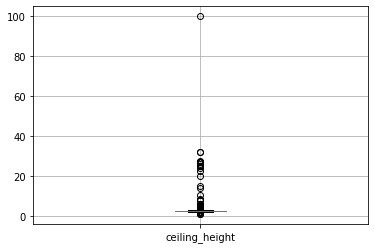

In [141]:
real_estate.boxplot('ceiling_height');

In [142]:
# посмотрим на распределение по перцентилям

perc =[.25, .50, .75, .85, .95, .99]
real_estate['ceiling_height'].describe(percentiles=perc)

count    23699.000000
mean         2.735523
std          0.994298
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
85%          2.950000
95%          3.130000
99%          3.600000
max        100.000000
Name: ceiling_height, dtype: float64

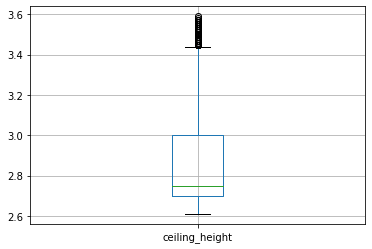

In [143]:
# 99% потолков ниже 3,6 м., в качестве нижней границы возьмём 25% - 2,6 м

real_estate.query('2.6 < ceiling_height < 3.6').boxplot('ceiling_height')
plt.show()

# сохраним в новую переменную
real_estate_good = real_estate_good.query('2.6 < ceiling_height < 3.6')

Высота потолков в большинстве квартир расположена в диапазоне от 2,6 до 3,6 м. Хотя видим, что есть и такие, где потолки даже ниже 2 м. и выше 4 м - отсекли их как выбросы.

**Много комнат**

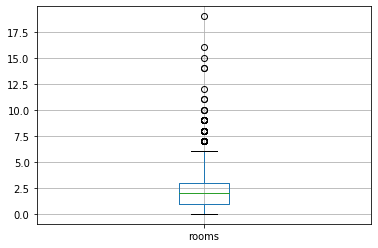

In [144]:
real_estate.boxplot('rooms');

In [145]:
# аналогично посмотрим на распределение по перцентилям

perc =[.25, .50, .75, .85, .95, .99]
real_estate['rooms'].describe(percentiles=perc)

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
85%          3.000000
95%          4.000000
99%          5.000000
max         19.000000
Name: rooms, dtype: float64

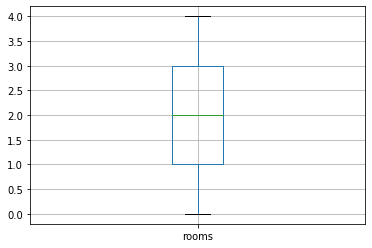

In [146]:
# уберём квартиры, где больше 5 комнат

real_estate.query('rooms < 5').boxplot('rooms');

# сохраним в новую переменную
real_estate_good = real_estate_good.query('rooms < 5')

1-3 комнаты - стандарт.
А вот больше 5 - это уже что-то из другой категории)

**Большая площадь**

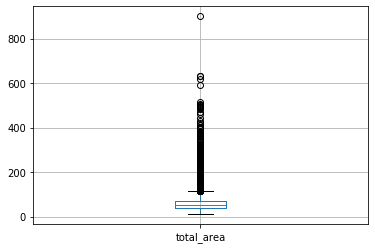

In [147]:
real_estate.boxplot('total_area');

In [148]:
# аналогично посмотрим на распределение по перцентилям

perc =[.25, .50, .75, .85, .90, .95, .99]
real_estate['total_area'].describe(percentiles=perc)

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
85%         82.000000
90%         93.520000
95%        116.000000
99%        197.214000
max        900.000000
Name: total_area, dtype: float64

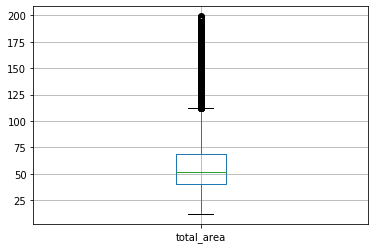

In [149]:
# ориентируемся на большинство, отрежем хвост из квартир, превышающих по площади 200 кв.м.
real_estate.query('total_area < 200').boxplot('total_area')
plt.show()

# сохраним в новую переменную
real_estate_good = real_estate_good.query('total_area < 200')

Квартиры от 40 до 70 кв. м. - самый распространённый вариант.
99 % квартир меньше 200 кв.м., дальше идёт длинный хвост из квартир-полигонов разной площади)

**Долго продаются**

In [150]:
# ещё раз посмотрим на распределение по перцентилям

perc =[.25, .50, .75, .85, .90, .95, .99]
real_estate['days_exposition'].describe(percentiles=perc)

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
85%        364.000000
90%        460.000000
95%        647.000000
99%       1068.660000
max       1580.000000
Name: days_exposition, dtype: float64

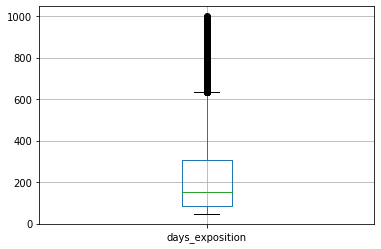

In [151]:
# ранее мы уже определили, что продажа квартиры быстрее чем за 2,5 недели и дольше 3 лет - это аномальные значения
# перцентили это подтвердают - отрежем выборку по ним

real_estate.query('45 < days_exposition < 1000').boxplot('days_exposition');

# сохраним в новую переменную
real_estate_good = real_estate_good.query('45 < days_exposition < 1000')

In [152]:
# сколько данных осталось

print(len(real_estate)) # исходный датасет
print(len(real_estate_good)) # после чистки аномальных значений

23699
7437


***Вывод***

Почистив датасет от выбросов, удалили почти 67% данных.

Зато у нас остались самые типовые квартиры на рынке недвижимости, на которые и стоит ориентироваться.

### 4. Какие факторы больше всего влияют на стоимость квартиры

Нужно понять, зависит ли цена от:
- квадратного метра (площади), 
- числа комнат,
- удалённости от центра,
- на каком этаже расположена квартира: первом, последнем или другом,
- даты размещения: дня недели, месяца и года.

#### Зависит ли цена от площади, числа комнат, удалённости от центра

In [153]:
# посмотрим, как коррелируют площадь, число комнат и удалённость от центра с ценой квартиры

print(real_estate_good['last_price'].corr(real_estate_good['total_area']))
print()
print(real_estate_good['last_price'].corr(real_estate_good['rooms']))
print()
print(real_estate_good['last_price'].corr(real_estate_good['cityCenters_nearest']))
print()

0.7898915680004587

0.5597272959559341

-0.3274099833158815



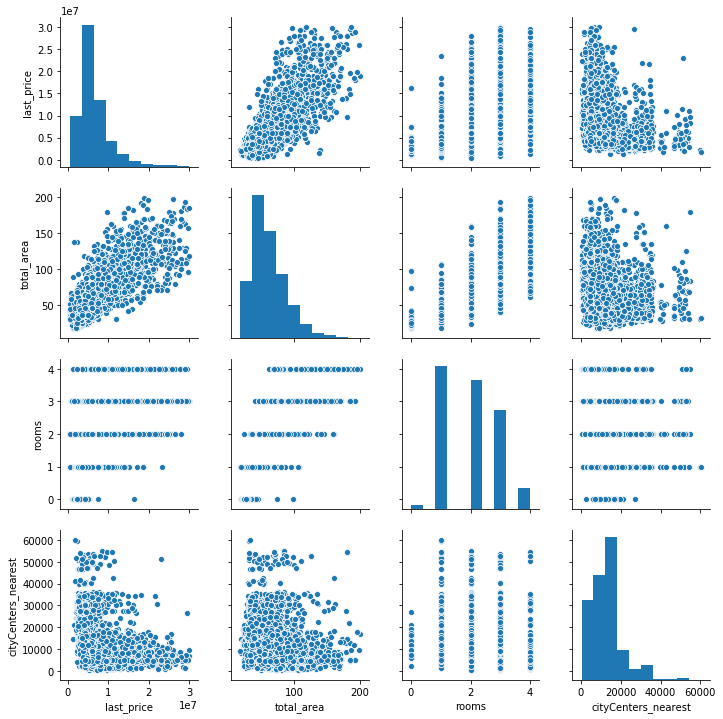

In [154]:
# сохраним параметры в список

parameters_for_price = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']

# визуализируем матрицу зависимостей параметров

sns_plot = sns.pairplot(real_estate_good[parameters_for_price])

#### Зависит ли цена за кв.м. от площади, числа комнат, удалённости от центра

In [155]:
# посмотрим, как коррелируют площадь, число комнат и удалённость от центра с ценой за кв.м.

print(real_estate_good['price_sq_m'].corr(real_estate_good['total_area']))
print()
print(real_estate_good['price_sq_m'].corr(real_estate_good['rooms']))
print()
print(real_estate_good['price_sq_m'].corr(real_estate_good['cityCenters_nearest']))
print()

0.14717260132046892

-0.019163085965933406

-0.35606918643980195



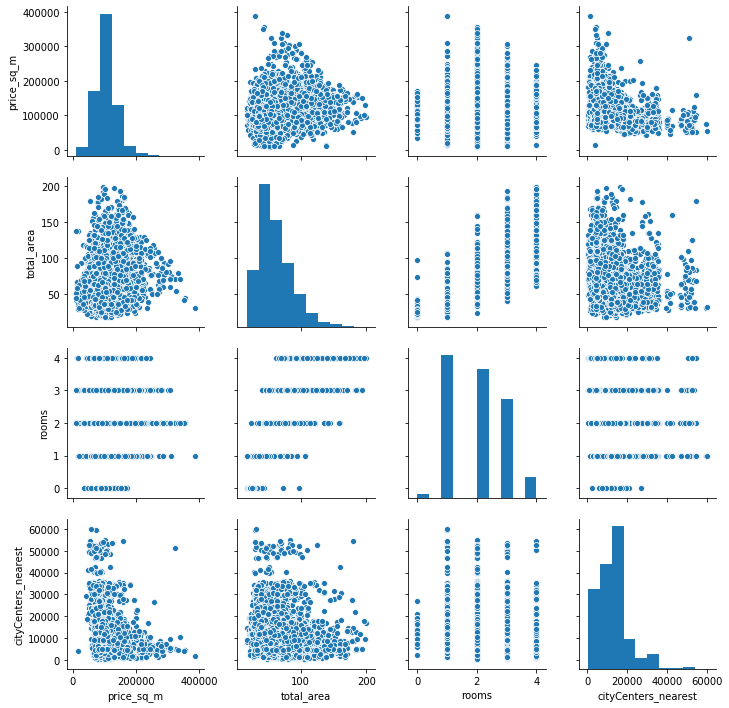

In [156]:
# сохраним параметры в список

parameters_for_price_m = ['price_sq_m', 'total_area', 'rooms', 'cityCenters_nearest']

# визуализируем матрицу зависимостей параметров

sns_plot = sns.pairplot(real_estate_good[parameters_for_price_m])

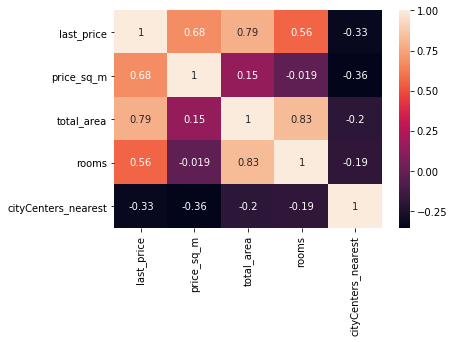

In [157]:
# дополнительно посмотрим на зависимости между всеми параметрами с помощью тепловой матрицы

parameters = ['last_price', 'price_sq_m', 'total_area', 'rooms', 'cityCenters_nearest']

sns.heatmap(real_estate_good[parameters].corr(), annot=True);

***Выводы***

Зависимость цены от площади квартиры высокая. Чем больше площадь, тем выше цена. Особенно это чувствуется для квартир до 100 кв.м.
При этом цена за кв.м. очень слабо зависит от площади квартиры.

Зависимость от числа комнат средняя. Цена, конечно, зависит от числа комнат, но при этом квартиры с одним и тем же количеством комнат могут стоить совершенно по-разному. Цена за кв.м. чуть выше для двушек.

Удалённость от центра слабо влияет на цену как самой квартиры, так и квадратного метра. На матрице можно увидеть большое скопление значений в левой нижней четверти на графике last_price-cityCenters_nearest - это говорит о том, что несмотря на удалённость мы видим совершенно разные цены для квартир на одном и том же расстоянии от центра, аналогично, видим одни и те же цены для квартир с разной дальностью от центра. Слабое влияние всё же прослеживается для квартир, наиболее приближенных к центру.


#### Зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом

              last_price
floor_type              
другой      6.780638e+06
первый      5.086771e+06
последний   6.766640e+06


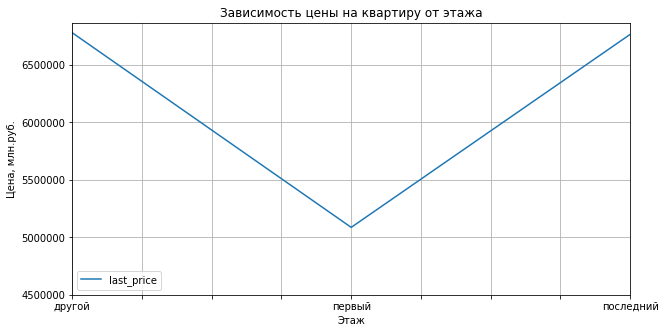

In [158]:
# посмотрим, как влияет этаж на стоимость квартиры

last_price_mean = real_estate_good.pivot_table(index='floor_type', values='last_price')
print(last_price_mean)

last_price_mean.plot(grid=True, ylim=4500000, figsize=(10, 5));
plt.title('Зависимость цены на квартиру от этажа');
plt.xlabel('Этаж');
plt.ylabel('Цена, млн.руб.');

               price_sq_m
floor_type               
другой      108305.413721
первый       85516.844384
последний    98500.280778


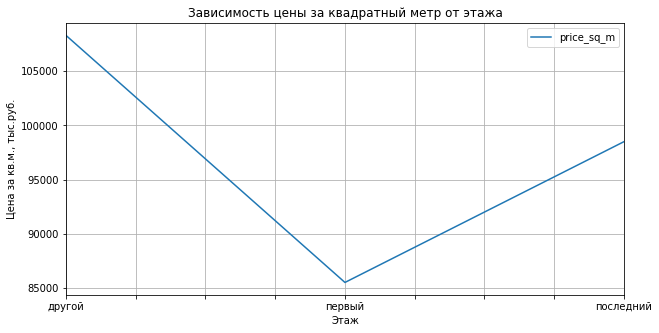

In [159]:
# также посмотрим, как влияет этаж на стоимость квадратного метра

last_price_mean = real_estate_good.pivot_table(index='floor_type', values='price_sq_m')
print(last_price_mean)

last_price_mean.plot(grid=True, figsize=(10, 5));
plt.title('Зависимость цены за квадратный метр от этажа');
plt.xlabel('Этаж');
plt.ylabel('Цена за кв.м., тыс.руб.');

***Выводы***

Самая низкая средняя цена у квартир, находящихся на первом этаже.
На последнем этаже квартиры в среднем на 1,5 млн. дороже, чем на первом.
На других этажах квартиры также дороже, чем на первом, но при этом цена несильно отличается от квартир на последнем этаже. 

Что касается цены за квардратный метр, то на первом этаже она также самая низкая. При этом на последнем этаже цена за кв.м. ощутимо ниже, чем на других этажах.

#### Зависит ли цена от даты размещения: дня недели, месяца и года

                  last_price
day_exposition              
Friday          6.541204e+06
Monday          6.420623e+06
Saturday        6.287489e+06
Sunday          6.467086e+06
Thursday        6.795238e+06
Tuesday         6.820270e+06
Wednesday       6.658894e+06


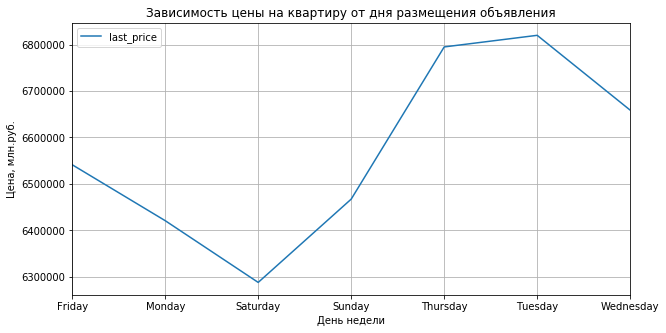

In [160]:
# посмотрим, как влияет день размещения на стоимость квартиры

day_exposition_mean = real_estate_good.pivot_table(index='day_exposition', values='last_price')
print(day_exposition_mean)

day_exposition_mean.plot(grid=True, figsize=(10, 5));
plt.title('Зависимость цены на квартиру от дня размещения объявления');
plt.xlabel('День недели');
plt.ylabel('Цена, млн.руб.');

                   price_sq_m
day_exposition               
Friday          105087.865415
Monday          104027.770536
Saturday        104342.055468
Sunday          103351.931689
Thursday        105854.887665
Tuesday         105228.443667
Wednesday       104564.928571


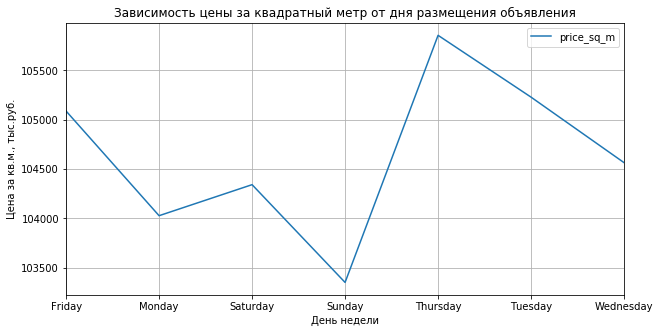

In [161]:
# также посмотрим, как влияет день размещения на стоимость квадратного метра

day_exposition_mean = real_estate_good.pivot_table(index='day_exposition', values='price_sq_m')
print(day_exposition_mean)

day_exposition_mean.plot(grid=True, figsize=(10, 5));
plt.title('Зависимость цены за квадратный метр от дня размещения объявления');
plt.xlabel('День недели');
plt.ylabel('Цена за кв.м., тыс.руб.');

                    last_price
month_exposition              
April             6.628773e+06
August            6.445858e+06
December          6.631297e+06
February          6.578855e+06
January           6.640279e+06
July              6.383122e+06
June              6.497087e+06
March             6.511243e+06
May               6.593136e+06
November          6.570145e+06
October           6.756442e+06
September         7.074284e+06


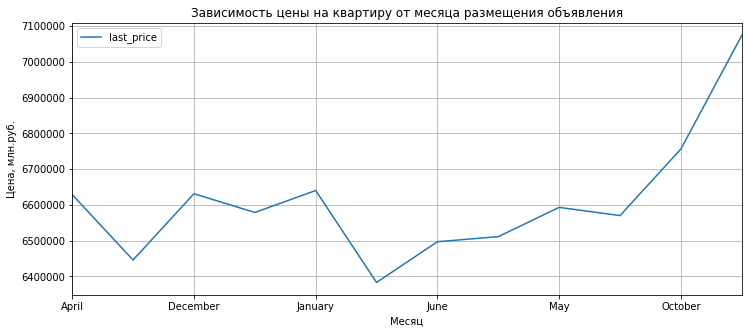

In [162]:
# как влияет месяц размещения на стоимость квартиры

month_exposition_mean = real_estate_good.pivot_table(index='month_exposition', values='last_price')
print(month_exposition_mean)

month_exposition_mean.plot(grid=True, figsize=(12, 5));
plt.title('Зависимость цены на квартиру от месяца размещения объявления');
plt.xlabel('Месяц');
plt.ylabel('Цена, млн.руб.');

                     price_sq_m
month_exposition               
April             103357.440000
August            104394.663763
December          104967.428044
February          103799.468675
January           106419.645030
July              104511.536232
June              105271.515249
March             103620.785820
May               106617.036961
November          102467.255474
October           105594.573416
September         107948.205167


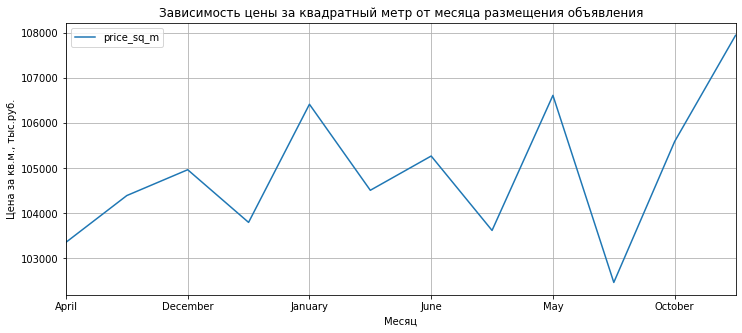

In [163]:
# как влияет месяц размещения на стоимость квадратного метра

month_exposition_mean = real_estate_good.pivot_table(index='month_exposition', values='price_sq_m')
print(month_exposition_mean)

month_exposition_mean.plot(grid=True, figsize=(12, 5));
plt.title('Зависимость цены за квадратный метр от месяца размещения объявления');
plt.xlabel('Месяц');
plt.ylabel('Цена за кв.м., тыс.руб.');

                   last_price
year_exposition              
2014             9.569386e+06
2015             6.603889e+06
2016             6.653650e+06
2017             6.658955e+06
2018             6.469103e+06
2019             6.785100e+06


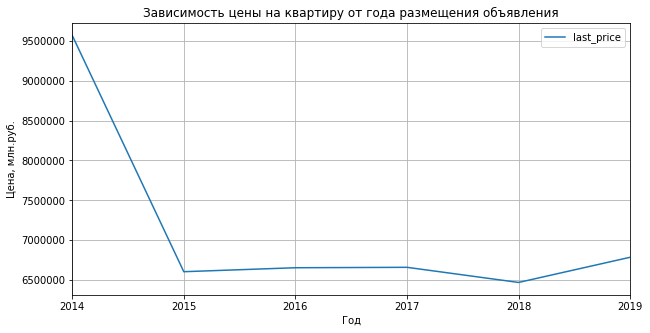

In [164]:
# как влияет год размещения на стоимость квартиры

year_exposition_mean = real_estate_good.pivot_table(index='year_exposition', values='last_price')
print(year_exposition_mean)

year_exposition_mean.plot(grid=True, figsize=(10, 5));
plt.title('Зависимость цены на квартиру от года размещения объявления');
plt.xlabel('Год');
plt.ylabel('Цена, млн.руб.');

                    price_sq_m
year_exposition               
2014             109806.466667
2015              99795.786885
2016             104335.495974
2017             104344.226253
2018             106154.065679
2019             111897.285714


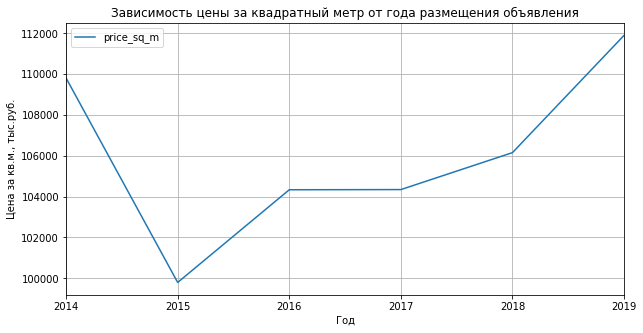

In [165]:
# как влияет год размещения на стоимость квадратного метра

year_exposition_mean = real_estate_good.pivot_table(index='year_exposition', values='price_sq_m')
print(year_exposition_mean)

year_exposition_mean.plot(grid=True, figsize=(10, 5));
plt.title('Зависимость цены за квадратный метр от года размещения объявления');
plt.xlabel('Год');
plt.ylabel('Цена за кв.м., тыс.руб.');

***Выводы***

У квартир, размещённых в выходные, самая низкая стоимость как самой квартиры, так и квадратного метра. А вот со вторника по четверг цену повышают.
Стоимость кв.м. рекордно низкая в воскресенье, а вот четверг - лидер по высокой цене за квадратный метр.

В сентябре на продажу поступают самые дорогие квартиры. Дешевле всего квартиры можно купить летом.
Цена за кв.м. самая высокая также в сентябре. Самый дешёвый квадратный метр - в ноябре, а также в апреле, феврале и марте.

В 2014 цены били рекорды, санкции - это не шутки для рынка. Меньше всего просили денег за свою квартиру собственники в 2018 году. В 2019 году цены снова начали расти.
Цена за кв.м. в 2019 резко подскочила и стала самой высокой за последние годы, на втором месте - 2014 год. Самым дешёвым кв.м. был в 2015 году.

### 5. 10 населённых пунктов с наибольшим числом объявлений

Нужно:
- Посчитать среднюю цену квадратного метра в этих населённых пунктах. 
- Выделить населённые пункты с самой высокой и низкой стоимостью жилья. 

In [166]:
# выделим 10 населённых пунктов с наибольшим числом объявлений

top_10 = real_estate_good['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург      5306
поселок Мурино        302
деревня Кудрово       165
поселок Парголово     154
поселок Шушары        146
Всеволожск            116
Пушкин                104
Кудрово                73
Сестрорецк             68
Гатчина                61
Name: locality_name, dtype: int64

                      price_sq_m
locality_name                   
Всеволожск          69574.077586
Гатчина             66551.459016
Кудрово             96599.657534
Пушкин             106065.894231
Санкт-Петербург    115972.090464
Сестрорецк         105975.470588
деревня Кудрово     91940.303030
поселок Мурино      85356.837748
поселок Парголово   90262.454545
поселок Шушары      80335.849315


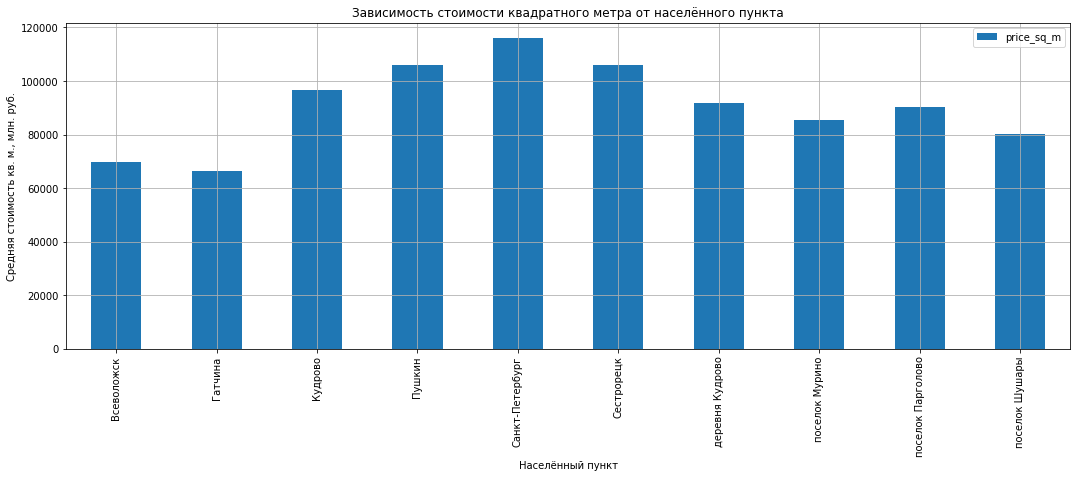

In [167]:
# считаем среднюю цену квадратного метра для 10 отфильтрованных населённых пунктов

top_10_mean = (
    real_estate_good
    .query('locality_name in @top_10.index')
    .pivot_table(index='locality_name', values='price_sq_m')
)
print(top_10_mean)

# отобразим результаты в виде графика

top_10_mean.plot(kind='bar', grid=True, figsize=(18, 6));
plt.title('Зависимость стоимости квадратного метра от населённого пункта');
plt.xlabel('Населённый пункт');
plt.ylabel('Средняя стоимость кв. м., млн. руб.');

***Выводы***

В Питере и Пушкине ожидаемо самая высокая цена за квадратный метр - крупные города с достопримечательностями. Также высокая цена в Сестрорецке - возможно, потому что город курортный.

В Всеволожске и Гатчине самые дешёвые квартиры.

### 6. Выделим, какие из квартир в Санкт-Петербурге входят в центральную зону

Нужно:
- Создать столбец с расстоянием до центра в километрах (округлить до целых значений). 
- Посчитать среднюю цену для каждого километра. 
- Построить график: должен показывать, как цена зависит от удалённости от центра. 
- Определить границу, где график сильно меняется — это и будет центральная зона.

In [168]:
# выделим в отдельную переменную все квартиры в Питере
spb = real_estate_good.query('locality_name == "Санкт-Петербург"')

# создадим столбец с расстоянием до центра в километрах (округлённый до целых значений)
spb.loc[: ,'cityCenters_nearest_km'] = (spb.loc[: ,'cityCenters_nearest'] / 1000).round(0)

# проверяем
spb.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_sq_m,day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,0.010000,0.010000,100000.0,Tuesday,June,2018,другой,8.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,553.0,137.0,0.025253,0.025253,127525.0,Thursday,November,2017,другой,14.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,NaN,397.0,0.012195,0.012195,81707.0,Thursday,November,2017,первый,11.0
17,6,4180000.0,36.0,2016-09-09,1,2.70,17,16.5,7,False,...,859.0,571.0,0.027778,0.027778,116111.0,Friday,September,2016,другой,15.0
19,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,False,...,NaN,97.0,0.008264,0.008264,117355.0,Wednesday,January,2019,другой,13.0


In [169]:
# посчитаем среднюю цену для каждого километра

spb_price_sq_m = spb.pivot_table(index='cityCenters_nearest_km', values='last_price')
spb_price_sq_m

,last_price
cityCenters_nearest_km,
0.0,7.522500e+06
1.0,1.073436e+07
2.0,9.803612e+06
3.0,8.975306e+06
4.0,9.734260e+06
5.0,1.059564e+07
6.0,9.381883e+06
7.0,1.051772e+07
8.0,9.750771e+06


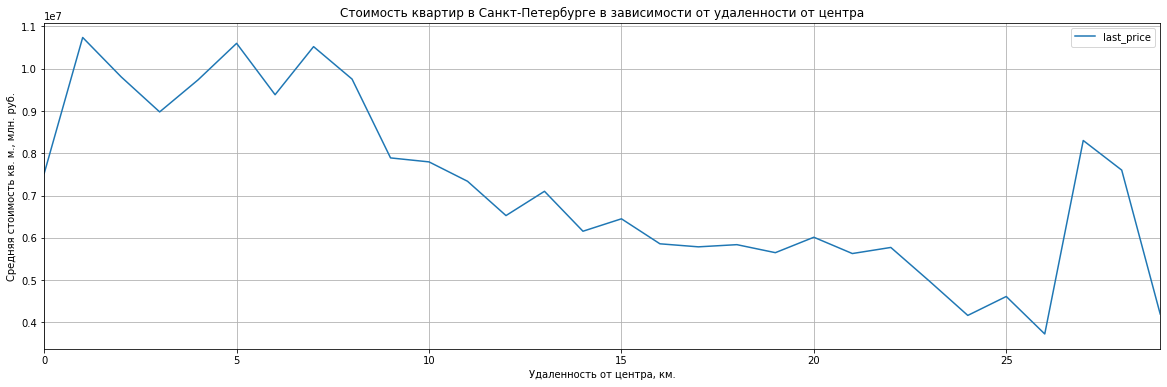

In [170]:
# построим график, который показывает, как цена зависит от удалённости от центра

spb_price_sq_m.plot(grid=True, figsize=(20, 6));
plt.title('Стоимость квартир в Санкт-Петербурге в зависимости от удаленности от центра');
plt.ylabel('Средняя стоимость кв. м., млн. руб.');
plt.xlabel('Удаленность от центра, км.');

In [171]:
# сохраним квартиры в центральной зоне в отдельную переменную

spb_center = spb.query('cityCenters_nearest_km <= 10')
spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_sq_m,day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,0.010000,0.010000,100000.0,Tuesday,June,2018,другой,8.0
24,8,6500000.0,97.2,2015-10-31,2,2.80,3,46.5,1,False,...,124.0,265.0,0.010288,0.010288,66872.0,Saturday,October,2015,первый,2.0
56,14,4350000.0,41.0,2016-03-28,1,2.80,7,18.1,4,False,...,439.0,152.0,0.024390,0.024390,106098.0,Monday,March,2016,другой,10.0
61,18,7990000.0,74.0,2017-08-24,2,3.00,4,43.0,4,False,...,NaN,609.0,0.013514,0.013514,107973.0,Thursday,August,2017,последний,4.0
85,13,5200000.0,46.3,2018-11-26,2,3.00,5,27.8,5,False,...,682.0,65.0,0.021598,0.021598,112311.0,Monday,November,2018,последний,9.0


***Выводы***

Начиная с 9-10 км. от центра цены на квартиры снижаются. Обозначили центральную зону расстоянием в пределах 10 км. от центра и сохранили квартиры, входящие в эту зону, в отдельную переменную spb_center.

### 7. Проанализировать сегмент квартир в центре

- Нужно изучить параметры: площадь, цена, число комнат, высота потолков. 
- Выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
- Понять, отличаются ли выводы для квартир в центре от общих выводов по всему городу.

**Площадь, цена, число комнат, высота потолков**

Будем смотреть данные для каждого параметра по двум гистограммам: отдельно для центральной зоны и для всего города.

total_area


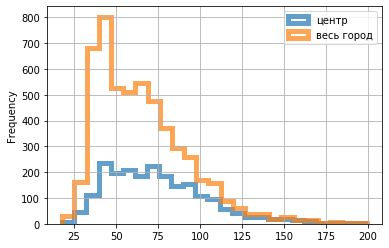

last_price


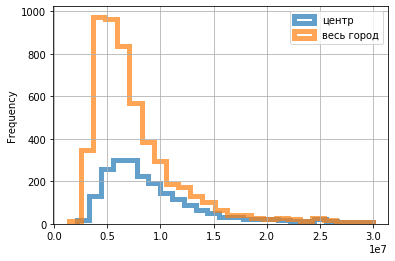

rooms


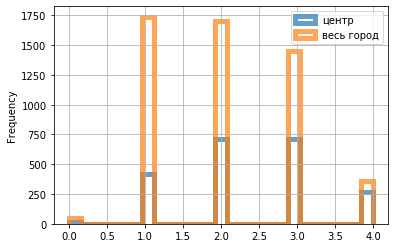

ceiling_height


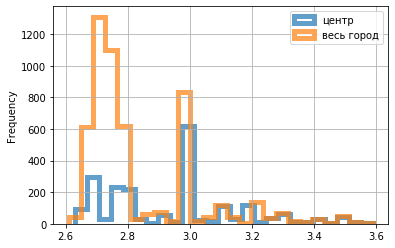

In [172]:
# выделим нужные параметры в отдельный список

spb_parameters = ['total_area', 'last_price', 'rooms', 'ceiling_height']

# построим столбчатые гистограммы с помощью цикла, перебирающего параметры из списка
# сравнение квартир по параметрам в центральной зоне и по всему городу будни отображать на одном графике

for spb_parameter in spb_parameters:
    print(spb_parameter)
    ax = spb_center.plot(
        kind='hist', y=spb_parameter, histtype='step', 
        bins=25, linewidth=5, alpha=0.7, label='центр')
    spb.plot(
        kind='hist', y=spb_parameter, histtype='step', 
        bins=25, linewidth=5, alpha=0.7, label='весь город', ax=ax, grid=True)
    plt.show() 

***Площадь***

Для всего города наиболее популярны квартиры с площадью 40-50 кв.м, затем идёт сегмент квартир с площадью 50-70 кв.м. 

В центре же можно выделить два пика для 40 и 70 кв. м. квартир, но при этом большинство квартир имеет площадь от 30 до 100 кв. м. - их количество по центру распределено достаточно равномерно (100 - 200 предложений).

***Цена***

По городу квартиры в среднем стоят от 4 до 5 млн.руб.

В центральной зоне цены расположились в диапазоне от 5 до 8 млн.руб.

***Число комнат***

В городе преобладают 1-комнатные квартиры, чуть меньше квартир с 2-мя комнатами. 

В центральной части больше предложений квартир с 2-3-мя комнатами, однушек почти вполовину меньше.

***Высота потолков***

В целом высота потолков по городу и в центре слабо отличается: большинство потолков имеет высоту до 2,8 м. 

Единственное отличие - если смотреть на соотношение, то в центре больше потолков с высотой от 3 до 3,2 м.

### Факторы, которые влияют на стоимость квартиры

**Зависимость цены квартиры от числа комнат и удалённости от центра**

In [173]:
# зависит ли цена от числа комнат и удалённости от центра

# центр Питера
print(spb_center['last_price'].corr(spb_center['rooms']))
print()
print(spb_center['last_price'].corr(spb_center['cityCenters_nearest']))
print()

# весь Питер
print(spb['last_price'].corr(spb['rooms']))
print()
print(spb['last_price'].corr(spb['cityCenters_nearest']))

0.45321042522719973

-0.11124120212395004

0.570776458732176

-0.36461823303878066


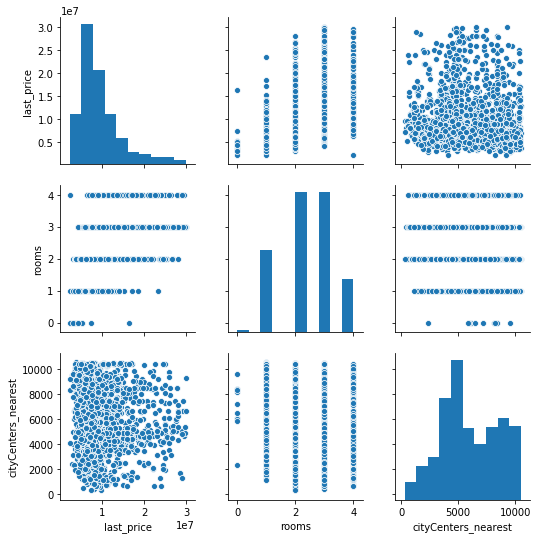

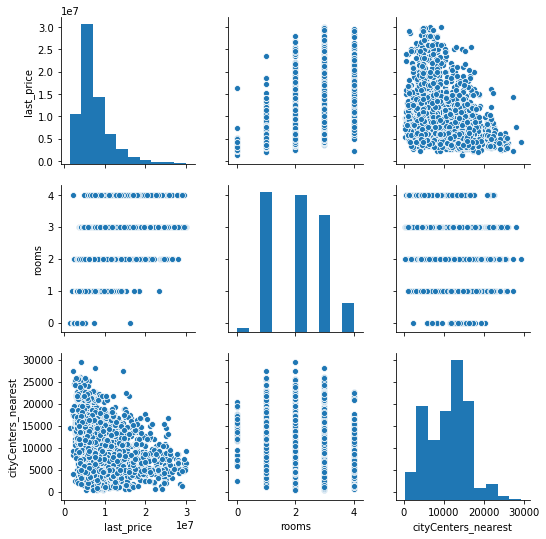

In [174]:
# матрицы корреляции
parameters_for_price_spb = ['last_price', 'rooms', 'cityCenters_nearest']

# центр Питера
sns_plot = sns.pairplot(spb_center[parameters_for_price_spb])

# весь Питер
sns_plot = sns.pairplot(spb[parameters_for_price_spb])

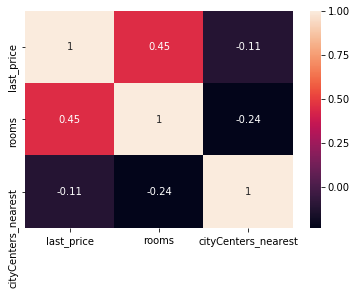

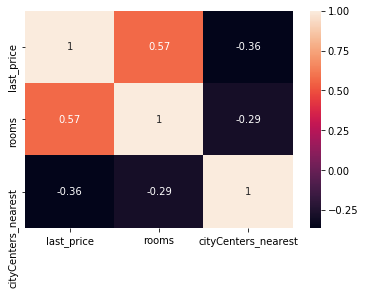

In [175]:
# визуализация матрицы корреляции цены от кол-ва комнат и удалённости от центра

# выделим параметры в отдельный список
parameters_for_price_spb = ['last_price', 'rooms', 'cityCenters_nearest']

# центр Питера
sns.heatmap(spb_center[parameters_for_price_spb].corr(), annot=True)
plt.show()

# весь Питер
sns.heatmap(spb[parameters_for_price_spb].corr(), annot=True)
plt.show()

**Зависимость цены за кв.м. от числа комнат и удалённости от центра**

In [176]:
# зависит ли цена за кв.м. от числа комнат и удалённости от центра

# центр Питера
print(spb_center['price_sq_m'].corr(spb_center['rooms']))
print()
print(spb_center['price_sq_m'].corr(spb_center['cityCenters_nearest']))
print()

# весь Питер
print(spb['price_sq_m'].corr(spb['rooms']))
print()
print(spb['price_sq_m'].corr(spb['cityCenters_nearest']))

-0.1908737127674304

-0.005598438560437529

-0.0890395014445071

-0.3061594251393015


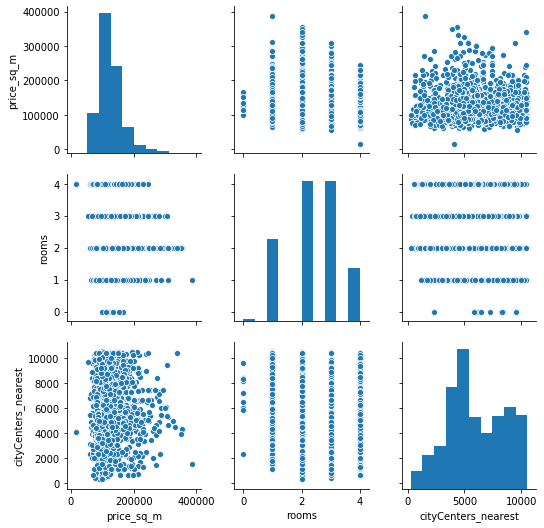

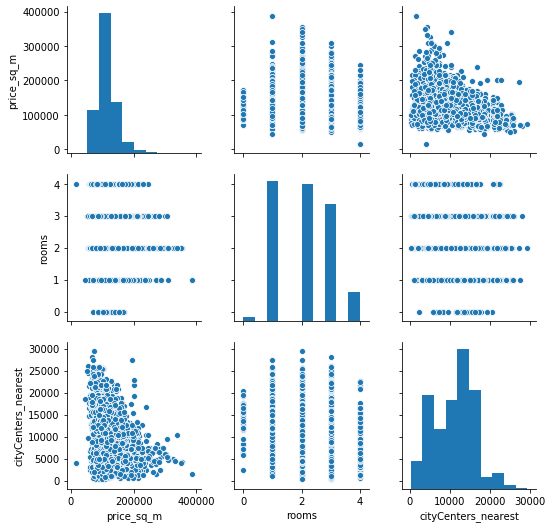

In [177]:
# матрицы корреляции
parameters_for_price_spb_m = ['price_sq_m', 'rooms', 'cityCenters_nearest']

# центр Питера
sns_plot = sns.pairplot(spb_center[parameters_for_price_spb_m])

# весь Питер
sns_plot = sns.pairplot(spb[parameters_for_price_spb_m])

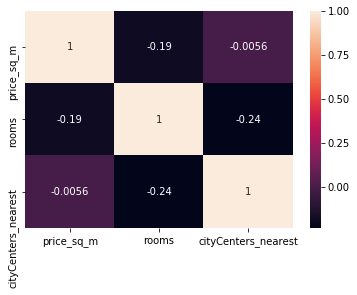

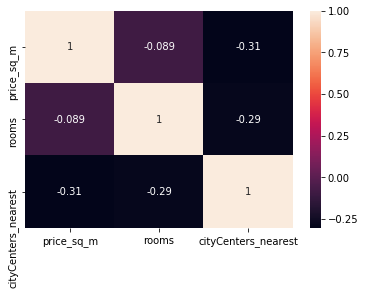

In [178]:
# визуализация матрицы корреляции цены от кол-ва комнат и удалённости от центра

# выделим параметры в отдельный список
parameters_for_price_spb_m = ['price_sq_m', 'rooms', 'cityCenters_nearest']

# центр Питера
sns.heatmap(spb_center[parameters_for_price_spb_m].corr(), annot=True)
plt.show()

# весь Питер
sns.heatmap(spb[parameters_for_price_spb_m].corr(), annot=True)
plt.show()

***Выводы***

***Цена за квартиру***

Корреляция цены и количества комнат в квартире: в центре Питера зависимость между этими параметрами слабая, по городу зависимость средняя.

Корреляция цены и удалённости от центра: в центральной зоне зависимости практически нет, в целом по городу - слабая (но не смотря на это, больше чем в два раза сильнее, чем в центре).

***Цена за кв.м.***

Корреляция цены за кв.м. и количества комнат в квартире очень слабая, что в центре, что во всём городе.

Корреляции между ценой за кв.м. и удалённости от центра нет в центральной зоне, в городе зависимость слабая.

***Общий вывод***

Кроме зависимости цены от кол-ва комнат в городе все остальные зависимости проявляются слабо. Делаем вывод, что влияние факторов на цену квартиры и кв.м. нелинейное.

**Зависит ли цена от этажа, на котором расположены квартира**

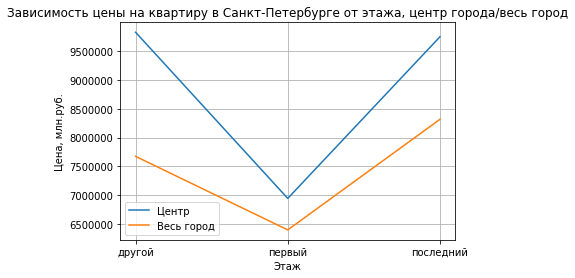

In [179]:
spb_center_pivot = spb_center.pivot_table(index='floor_type', values='last_price')
plt.plot(spb_center_pivot, label='Центр')

spb_pivot = spb.pivot_table(index='floor_type', values='last_price')
plt.plot(spb_pivot, label='Весь город')

plt.title('Зависимость цены на квартиру в Санкт-Петербурге от этажа, центр города/весь город')
plt.xlabel('Этаж')
plt.ylabel('Цена, млн.руб.')
plt.legend()
plt.grid()
plt.show() 

***Выводы***

Что в центре, что в целом по городу дешевле всего квартиры на первых этажах. А для остальных этажей разница существенная:

- в центре квартиры на последнем и других этажах стоят примерно одинаково,
- по всему городу квартиры на последних этажах стоят в среднем почти на 2 млн.р. дороже, чем на других.

Чем дальше от центра, тем привлекательней кажутся виды на город? Возможно, в этих домах есть выходы на знаменитые питерские крыши или оборудованы красивые мансарды?) 

**Зависит ли цена от даты размещения объявления**

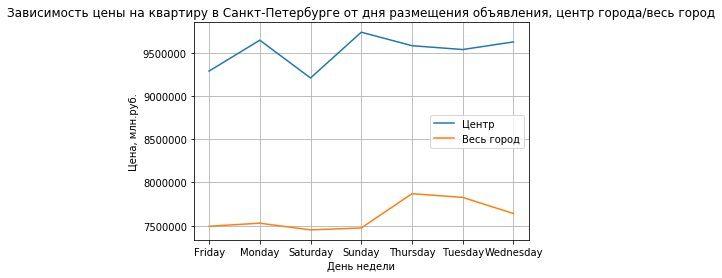

In [180]:
# день размещения

spb_center_pivot = spb_center.pivot_table(index='day_exposition', values='last_price')
plt.plot(spb_center_pivot, label='Центр')

spb_pivot = spb.pivot_table(index='day_exposition', values='last_price')
plt.plot(spb_pivot, label='Весь город')

plt.title('Зависимость цены на квартиру в Санкт-Петербурге от дня размещения объявления, центр города/весь город')
plt.xlabel('День недели')
plt.ylabel('Цена, млн.руб.')
plt.legend()
plt.grid()
plt.show() 

***Выводы***

Как ни странно, в центре суббота и воскресенье абсолютно зеркальны: в субботу цены самые низкие, а в воскресенье - самые высокие на неделе.
По городу оба выходных показывают самые низкие цены.

Четверг и среда отличаются ценами повыше. В городе ещё и вторник входит в тройку дней с высокими ценами на квартиры.

                    last_price
month_exposition              
April             9.408460e+06
August            9.565372e+06
December          8.793437e+06
February          9.209376e+06
January           9.676529e+06
July              9.354955e+06
June              9.168557e+06
March             9.608873e+06
May               9.095685e+06
November          9.923932e+06
October           1.028833e+07
September         1.009197e+07
                    last_price
month_exposition              
April             7.635354e+06
August            7.477520e+06
December          7.608644e+06
February          7.681028e+06
January           7.786790e+06
July              7.399069e+06
June              7.486562e+06
March             7.580235e+06
May               7.395955e+06
November          7.723680e+06
October           7.765187e+06
September         8.123288e+06


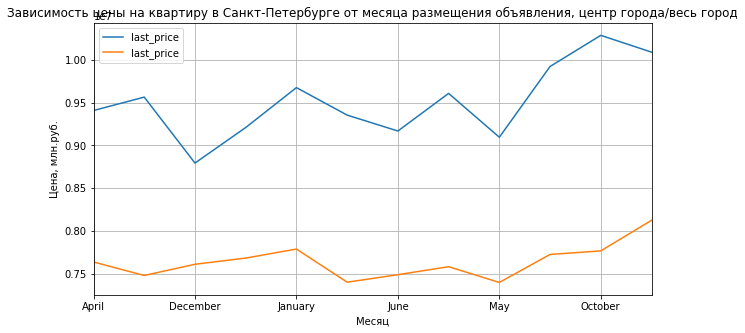

In [181]:
# месяц размещения

spb_center_pivot = spb_center.pivot_table(index='month_exposition', values='last_price')
print(spb_center_pivot)
ax = spb_center_pivot.plot(grid=True, figsize=(10, 5))

spb_pivot = spb.pivot_table(index='month_exposition', values='last_price')
print(spb_pivot)
spb_pivot.plot(grid=True, figsize=(10, 5), ax=ax)

plt.title('Зависимость цены на квартиру в Санкт-Петербурге от месяца размещения объявления, центр города/весь город')
plt.xlabel('Месяц')
plt.ylabel('Цена, млн.руб.')
plt.show() 

***Выводы***

И в центре, и во всём городе в мае можно купить квартиру по низким ценам. В центре квартиры подешевле выставляют ещё и в декабре.

Сентябрь и октябрь - время дорогих квартир по всему городу, в том числе и в центре. И в январе цены на недвижимость подскакивают - новая жизнь в новом году?)

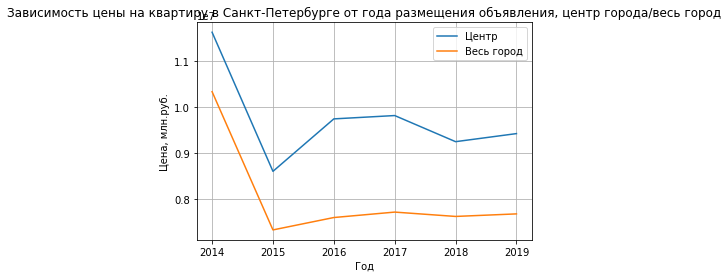

In [182]:
# год размещения

spb_center_pivot = spb_center.pivot_table(index='year_exposition', values='last_price')
plt.plot(spb_center_pivot, label='Центр')

spb_pivot = spb.pivot_table(index='year_exposition', values='last_price')
plt.plot(spb_pivot, label='Весь город')

plt.title('Зависимость цены на квартиру в Санкт-Петербурге от года размещения объявления, центр города/весь город')
plt.xlabel('Год')
plt.ylabel('Цена, млн.руб.')
plt.legend()
plt.grid()
plt.show() 

***Выводы***

По годам ситуация с ценами одинаковая: в 2014 рынок недвижимости скакнул в ценах по всей стране и Питер - не исключение. Сказались наложенные на Россию санкции.

Зато 2015 год, последовавший за ним, порадовал резким снижением цен на недвижимость.

В центре с 2017 года также наблюдается тенденция к удешевлению квартир, по всему городу при этом с ценами всё стабильно.

## Шаг 5. Общий вывод

Рынок недвижимости Питера и окрестностей выглядит вполне типовым: метраж квартир такой же, как и в среднем по России (40-70 кв.м), продают в основном 1-3-комнатные квартиры с потолками в районе 3 м.

По цене разброс разный - зависит от населённого пункта. Конечно, Питер и Пушкин отличаются более дорогим жильём, чем деревни и посёлки рядом с ними. Достопримечательности, культурная ценность и богатая история повышают цену на проживание.

Элитной недвижимости с запредельным количеством комнат и жилой площади немного, в основном квартиры продают за 3-7 млн.руб.
Но при этом у цены есть свои зависимости: чем большей площадь, тем квартира дороже; если первый этаж - то гораздо дешевле, чем на другом. А ещё в Питере квартиры на последних этажах стоят столько же, сколько и на других, вне центрального района даже дороже (питерские крыши - классика).

В выходные можно отхватить квартиру подешевле, чем в разгар рабочей недели. А вот в сентябре плоды пожинают не только на огородах, но и собственники квартир оценивают их гораздо дороже, зато в начале весны и летом - затишье, цены снижаются.
В годы кризисов цены ожидаемо подскакивают, но затем также быстро выравниваются - стоит только подождать.

Это общий вывод. Ниже более подробно по каждому разделу.


#### Самые типовые параметры для квартир на рынке:

1. Квартиры с площадью от 40 до 70 кв. м. - самый распространённый вариант на рынке недвижимости. 
Не много, не мало - в самый раз.

2. В основном цены на квартиры в Питере и окресностях лежат в диапазоне до 10 млн.руб., с пиком около 4-5 млн.руб. 
Большинство квартир продаётся по цене от 3 до 7 млн.руб.

3. Чаще всего продают 1-2-комнатные квартиры. Трёшки отстают по предложеням совсем немного. 
Для нашей страны это самые популярные варианты, ничего удивительного.

4. Высота потолков в большинстве квартир расположена в диапазоне от 2,5 до 3 м. 
Вполне типовой вариант.

5. Продажа квартиры в среднем занимает обычно от 1,5 до 7 месяцев. Можно рассчитывать на продажу за год.

#### Зависимости цены квартиры от разных параметров:

1. От площади квартиры высокая. Чем больше площадь, тем выше цена.
2. От числа комнат средняя. Всё-таки площадь чуть важнее, чем кол-во комнат.
3. Удалённость от центра слабо влияет на цену.
4. Этажность. 
Самая низкая средняя цена у квартир, находящихся на первом этаже. На последнем этаже квартиры в среднем на 1,5 млн. дороже, чем на первом. На других этажах квартиры также дороже, чем на первом, но при этом цена несильно отличается от квартир на последнем этаже. Мало кто любит жить на первом этаже - не те виды, не тот воздух)
5. От дня недели размещения объявления.
У квартир, размещённых в выходные, самая низкая стоимость. А вот со вторника по четверг цену повышают - похоже, что сказывается разгар рабочей недели.
6. От месяца размещения объявления.
В сентябре на продажу поступают самые дорогие квартиры. Все вернулись с отдыха, дети пошли в школу: осень - время для начинаний (забавно вспомнить, что до Петра I 1 сентября отмечали Новый год). Хорошее время, чтобы и квартиру на продажу выставить. 
Дешевле всего квартиры можно купить в начале весны и летом.
7. От года размещения объявления.
Меньше всего просили денег за свою квартиру собственники в 2018 году. Зато в 2014 "благодаря" санкциям из-за присоединения Крыма к России рынок недвижимости сильно подскочил в цене - квартиры стоили на 3 млн. дороже чем в последующие годы.

#### Разброс цен в зависимости от населённого пункта

В Питере и Пушкине ожидаемо самая высокая цена за квадратный метр - крупные города с достопримечательностями.
Также высокая цена в Сестрорецке - возможно, потому что город курортный.

В Всеволожске и Гатчине самые дешёвые квартиры.


#### Центр или окраина? Как влияет местоположение квартиры на её стоимость в Санкт-Петербурге:

1. Площадь.
Для всего города наиболее популярны квартиры с площадью 40-50 кв.м, затем идёт сегмент квартир с площадью 50-70 кв.м.
В центре же можно выделить два крупных сегмента с предложениями квартир с метражом 40 и 70 кв. м., но при этом большинство квартир имеет площадь от 30 до 100 кв. м. - их количество по центру распределено достаточно равномерно (125 - 170 предложений).
2. Цена.
По городу квартиры в среднем стоят от 4 до 5 млн.руб.
В центральной зоне цены расположились в диапазоне от 5 до 8 млн.руб.
3. Число комнат.
В городе преобладают 1-2-комнатные квартиры.
В центральной части больше предложений квартир с 2-3-мя комнатами, однушек почти вполовину меньше. Да и парадные там ого-го-го. Масштаб - наше всё)
4. Потолки.
Высота потолков по городу и в центре слабо отличается: большинство потолков имеет высоту до 2,8 м.
Единственное отличие - в центре больше потолков с высотой от 3 до 3,2 м.

**Как зависит цена от разных параметров:**
1. Количества комнат в квартире.
В центре Питера зависимость между этими параметрами слабая, по городу зависимость средняя.
Делаем вывод, что это не самый важный фактор для формирования стоимости квартиры.
2. Удалённость от центра.
В центральной зоне зависимости практически нет, всё достаточно близко друг к другу.
По городу зависимость слабая, но всё-таки она есть и больше чем в два раза сильнее, чем в центре.
3. Этажность.
Что в центре, что в целом по городу дешевле всего квартиры на первых этажах. 
А для остальных этажей разница существенная:
- в центре квартиры на последнем и других этажах стоят примерно одинаково,
- по всему городу квартиры на последних этажах стоят в среднем почти на 2 млн.р. дороже, чем на других.
Чем дальше от центра, тем привлекательней кажутся виды на город? Возможно, в этих домах есть выходы на знаменитые питерские крыши или оборудованы красивые мансарды?) 
4. День недели.
Как ни странно, в центре суббота и воскресенье абсолютно зеркальны: в субботу цены самые низкие, а в воскресенье - самые высокие на неделе. По городу оба выходных показывают самые низкие цены.
Четверг и среда отличаются ценами повыше. В городе ещё и вторник входит в тройку дней с высокими ценами на квартиры.
Почему-то в середине рабочей недели люди оценивают свои квартиры дороже, чем в выходные. Удручает необходимость работать?
5. Месяц.
И в центре, и во всём городе в мае можно купить квартиру по низким ценам. В центре квартиры подешевле выставляют ещё и в декабре.
Сентябрь и октябрь - время дорогих квартир по всему городу, в том числе и в центре. И в январе цены на недвижимость подскакивают - новая жизнь в новом году?)
6. Год.
По годам ситуация с ценами одинаковая: в 2014 рынок недвижимости скакнул в ценах по всей стране и Питер - не исключение. Сказались наложенные на Россию санкции.
Зато 2015 год, последовавший за ним, порадовал резким снижением цен на недвижимость.
В центре с 2017 года также наблюдается тенденция к удешевлению квартир, по всему городу при этом с ценами всё стабильно.